# 타이타닉 생존자 예측
- 지도학습(Supervised Learning) : 학습을 위한 다양한 피처(feature)와 분류 결정값인 레이블(label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다. 즉 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식이다.
- 분류(Classification) : 대표적인 지도학습 방법의 하나.
- 학습 데이터 세트 : 학습을 위해 주어진 데이터 세트
- 테스트 데이터 세트 : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트

#### 머신러닝 지도학습 프로세스
1. 데이터 전처리
2. 데이터 세트 분리
3. 모델 학습 및 검증 평가
4. 예측 수행
5. 평가

#### 타이타닉 생존자 ML 예측 구현
- 데이터 전처리
  - 결손값 처리
  - 불필요한 속성 제거
  - 인코딩
- 모델 학습 및 검증 평가
  - 결정트리/렌덤포레스트/로지스틱 회귀 학습 비교
  - K 폴드 교차 검증
  - cross_val_score() 수행
  - GridSearchCV() 수행
  
#### 타이타닉 탑승자 데이터
- PassengerID : 탑승자 데이터 일련번호
- Survived : 생존 여부(0=사망, 1=생존)
- Pclass : 티켓의 선실 등급(1=일등석, 2=이등석, 3=삼등석)
- Name : 탑승자 이름
- Sex : 탑승자 성별
- Age : 탑승자 나이
- SibSp : 같이 탑승한 형제자매 또는 배우자 인원수
- Parch : 같이 탑승한 부모님 또는 어린이 인원수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 선실 번호
- Embarked : 중간 정착 항구(C=Cherbourg, Q=Queenstown, S=Southampthon)

### 사이킷런
- 사이킷런(scikit-learn) : 파이썬 머신러닝 라이브러리로 API 일관성과 개발 편의성을 제공한다.
- 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공한다.
- 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공한다.
- 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리이다.

#### 주요 모듈 및 용어
- sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임이다.
- sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)
- sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임이다.
- sklearn.tree : 트리 기반 ML 알고리즘을 구현한 클래스의 모임이다.
- sklearn.ensemble : 앙상블 알고리즘 제공. 랜덤 포레스트, 에이다 부스트, 그래이던트 부스팅 등을 제공
- sklearn.linear_model : 주로 선형 회귀. 릿지(Ridge), 라쏘(Lasso) 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원.
- sklearn.matrics : 분류, 회귀, 클러스터링, 페어와이즈(Pairwise)에 대한 다양한 성능 측정 방법을 제공하는 모듈의 모임이다.
- 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터다. 이를 통해 머신러닝 알고리즘의 성능을 튜닝한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
# 데이터 칼럼 타입 확인
print('\n ### train 데이터 정보 ### \n')
print(titanic_df.info())


 ### train 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### 1. 결손값 처리

In [3]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [4]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
titanic_df.isnull().sum().sum()

0

### 2. 문자열 피처들의 값 분포

In [7]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
titanic_df['Cabin'].value_counts()

N              687
G6               4
C23 C25 C27      4
B96 B98          4
C22 C26          3
              ... 
B102             1
B41              1
B80              1
C54              1
A5               1
Name: Cabin, Length: 148, dtype: int64

- Cabin의 경우 N이 687건으로 가장 많다.
- 'C23 C25 C27'과 같이 여러 Cabin이 한꺼번에 표기된 값이 4개이다.
- 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요하다.

In [9]:
# Cabin 속성의 앞 문자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [10]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

### 3. 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지 확인한다.

#### groupby() 적용
- DataFrame의 groupby()는 RDBMS SQL의 groupby 키워드와 유사하면서도 다른 면이 있기 때문에 주의한다.
- DataFrame의 groupby() 사용 시 입력 파라미터 by에 칼럼을 입력하면 대상 칼럼으로 groupby된다.
- DataFrame에 groupby()를 호출하면 DataFrameGroupBy라는 또 다른 형태의 DataFrame을 반환한다.

In [11]:
# 성별에 따른 생존자 수 비교
titanic_df.groupby(by=['Sex', 'Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   81     81     81      81    81   
       1                 233     233   233  233    233    233     233   233   
male   0                 468     468   468  468    468    468     468   468   
       1                 109     109   109  109    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0            81        81  
       1           233       233  
male   0           468       468  
       1           109       109

In [12]:
titanic_df.groupby(by=['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

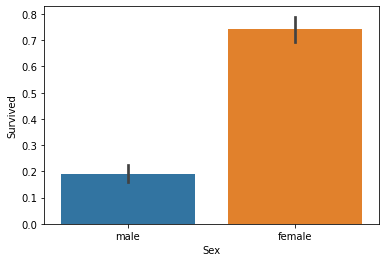

In [13]:
# 가로 막대 그래프
sns.barplot(x='Sex', y='Survived', data=titanic_df)

- 시본(Seaborn) 패키지를 이용한다.
- X축에 'Sex' 칼럼, Y축에 'Survived' 칼럼, 데이터로 DataFrame 객체명을 입력하고 barpolt() 함수를 호출한다.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

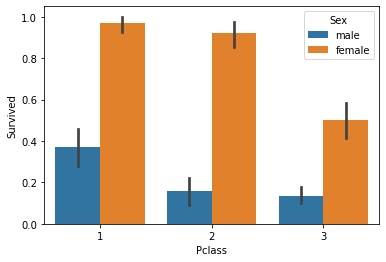

In [14]:
# 선실 등급별 성별에 따른 생존자 수 비교
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

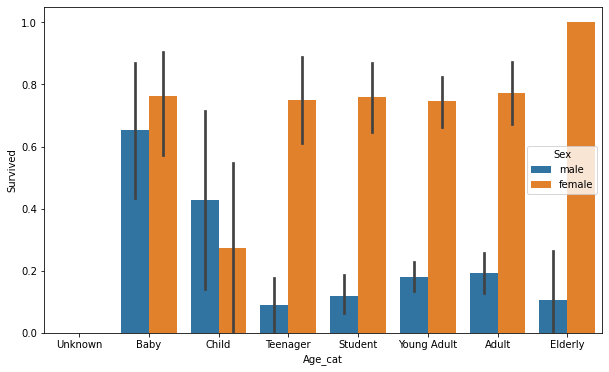

In [15]:
# 나이에 따른 생존자 수 비교
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    if age <= -1: return 'Unknown'
    if age <= 5: return 'Baby'
    if age <= 12: return 'Child'
    if age <= 18: return 'Teenager'
    if age <= 25: return 'Student'
    if age <= 35: return 'Young Adult'
    if age <= 60: return 'Adult'
    return 'Elderly'

    

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

- Sex, Pclass, Age 등이 중요하게 생존을 좌우하는 피처임을 확인할 수 있다.

### 4. 레이블 인코딩
- 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
- 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있다.
- 숫자 값의 크고 작음에 대한 특성이 작용하기 때문
- 회귀와 같은 ML 알고리즘에는 적용하지 않는다.
- 트리 게열의 ML 알고리즘은 별문제가 없다.

#### LabelEncoder 객체
- 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수-1)까지의 숫자 값으로 변환

In [16]:
# 사이킷런의 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프레임워크 API인 fit(), transform()으로 데이터를 변환
# 여러 칼럼을 encode_features() 함수를 새로 생성에 한 번에 변환
from sklearn import preprocessing

def encode_feature(dataDF):
    
    features = ['Sex', 'Cabin', 'Embarked']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_feature(titanic_df)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


- Sex, Cabin, Embarked 속성이 숫자형으로 바뀐 것을 알 수 있다.

### 5. 데이터 전처리

In [17]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df
    

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [18]:
# 원본 데이터를 재로딩 하고, feature 데이터 셋과 Label 데이터 셋 추출
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

### 5. 데이터 세트 분리
- test_size: 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다. 디폴트는 0.25, 즉 25%
- random_state: 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값이다. 이를 지정하지 않으면 수행할 때마다 다른 학습/테스트용 데이터를 생성한다.
- train_test_split()의 반환 값은 튜플 형태이다. 순서대로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환된다.
  - X_train : 학습용 피처 데이터 세트
  - y_train : 학습용 레이블 데이터 세트
  - X_test : 테스트용 피처 데이터 세트
  - y_test : 테스트용 레이블 데이터 세트

In [19]:
from sklearn.model_selection import train_test_split

# X: feature(특징), Y: label(정답)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                   test_size=0.2, random_state=11)

### 6. 모델 학습 및 예측 평가
- fit() 메서드 : 학습용 피처 데이터 세트와 레이블 데이터 세트를 입력해 호출하면 학습을 수행한다.
- predict() 메서드 : 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터에 대한 예측값을 반환한다.
- accuracy_score() : 첫 번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트를 입력한다.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=200)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


### 7. 교차 검증 및 예측 평가

#### 교차 검증(cross-validation)
- 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생긴다.
- 결국은 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트 데이터가 들어올 경우에는 성능이 저하된다.
- 이런 문제점을 개선하기 위해 교차 검증을 이용한다.
- 과적합(Overfitting) : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것을 말한다.
- 교차 검증 : 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다. 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있다.
- 대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스이다.
  - ML에 사용되는 데이터를 세분화해서 학습, 검증, 테스트 데이터 세트로 나눈다.
  - 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 둬서 최종 평가가 이전에 학습된 모델을 다양하게 평가하는 데 사용한다.
  
#### K 폴드 교차 검증
- 가장 보편적으로 사용되는 교차 검증 기법으로 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행한다.
  1. 데이터 세트를 K등분한다.
  2. 첫 번째 반복에서는 처음부터 K-1등분을 학습 데이터, 마지막 K번째 등분 하나를 검증 데이터 세트로 설정한다.
  3. 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가를 수행한다.
  4. 두 번째 반복에서 처음부터 K-2등분까지, 그리고 마지막 K번째 등분을 학습 데이터 세트로, K-1번째 등분 하나를 검증 데이터 세트로 설정한다.
  5. 학습 데이터 세트에서 학습 수행, 검증 데이터 세트에서 평가를 수행한다.
  6. 이렇게 학습 데이터 세트와 검증 데이터 세트를 점진적으로 변경하면서 마지막 K번째까지 학습과 검증을 수행한다.

In [21]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
                                # test : 검증용 데이터
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)): # enumerate : for문 횟수를 함께 반환함
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
    
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도: 0.7823


#### 교차 검증을 보다 간편하게 - cross_val_score()
- 교차 검증을 좀 더 편리하게 수행할 수 있게 해주는 API
    1. 폴드 세트를 설정한다.
    2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한다.
    3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환한다.
- cross_val_score() API의 선언 형태
    - cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    - 주요 파라미터는 estimator, X, y, scoring, cv이다.
    - estimator는 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미한다.
    - X는 피처 데이터 세트, y는 레이블 데이터 세트, scoring은 예측 성능 평가 지표를 기술한다.
    - cv는 교차 검증 폴드 수를 의미한다.
    - cross_val_score() 수행 후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환한다.
    - estimator는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할한다.
- cross_val_score()는 평가 결과 값을 배열로 반환한다.
- 일반적으로 이를 평균해 평가 수치로 사용한다.
- 내부에서 Estimatior를 학습(fit), 예측(predict), 평가(evaluation)시켜주므로 간단하게 교차 검증을 수행할 수 있다.
- cross_validate()는 여러 개의 평가 지표를 반환할 수 있다. 또한 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공한다.

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


#### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
- 하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선한다.
- 사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출하는 방안을 제공한다.

#### GridSearchCV 클래스
- GridSearchCV는 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾게 해준다.
- 데이터 세트를 교차 검증을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 한다.
- 동시에 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸린다.
- 생성자로 들어가는 주요 파라미터는 다음과 같다.
  - estimator
  - scoring
  - cv
  - param_grid : key + 리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정한다.
  - refit : 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.
- 테스트할 하이퍼 파라미터 세트는 딕셔너리 형태로 하이퍼 파라미터의 명칭은 문자열 key 값으로, 하이퍼 파라미터의 값은 리스트 형으로 설정한다.
- params 칼럼에는 수행할 때마다 적용된 개별 하이퍼 파라미터값을 나타낸다.
- rank_test_score는 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타낸다. 1이 가장 뛰어난 순위이며 최적의 파라미터이다.
- mean_test_score는 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값이다.
- GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그 때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록된다.
- refit=True이면 GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장한다.
- 이미 학습된 best_estimator_를 이용해 앞에서 train_test_split()으로 분리한 테스트 데이터 세트에 대해 예측하고 성능을 평가한다.
- GridSearchCV의 bes_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없다.
- 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법이다.

In [23]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [2, 3, 4, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 5, 8]
}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
